In [1]:
import glob
csv_files = glob.glob('*.csv')
for file in csv_files:
    print(file)

NVIDIA_A100-SXM4-40GB_175b.csv
Tesla_V100-SXM2-32GB_175b.csv


In [34]:
import pandas as pd
import matplotlib.pyplot as plt

In [9]:
file_name = "NVIDIA_A100-SXM4-40GB_175b.csv"
df1 = pd.read_csv(file_name)
df1["device"] = "A100"

In [10]:
file_name = "Tesla_V100-SXM2-32GB_175b.csv"
df2 = pd.read_csv(file_name)
df2["device"] = "V100"

In [11]:
df_concat = pd.concat([df1, df2])

In [12]:
df_concat.columns

Index(['shard', 'h1', 'h2', 'bit', 'batch_size', 'input_seq_length',
       'past_seq_length', 'lat_avg', 'mem_weight', 'mem_kv', 'mem_embedding',
       'mem_all', 'device'],
      dtype='object')

In [63]:
df1[(df1["batch_size"] == 4) & (df1["input_seq_length"] == 1) &  (df1["past_seq_length"] >= 512)]

,shard,h1,h2,bit,batch_size,input_seq_length,past_seq_length,lat_avg,mem_weight,mem_kv,mem_embedding,mem_all,device
64,0,12288,49152,4,4,1,512,0.003130,288.445328,192.375,0.09375,480.914078,A100
65,0,12288,49152,4,4,1,532,0.003265,288.445328,199.875,0.09375,488.414078,A100
66,0,12288,49152,4,4,1,552,0.003176,288.445328,207.375,0.09375,495.914078,A100
67,0,12288,49152,4,4,1,572,0.003203,288.445328,214.875,0.09375,503.414078,A100
68,0,12288,49152,4,4,1,592,0.003208,288.445328,222.375,0.09375,510.914078,A100
69,0,12288,49152,8,4,1,512,0.004096,576.468765,192.375,0.09375,768.937515,A100
70,0,12288,49152,8,4,1,532,0.004155,576.468765,199.875,0.09375,776.437515,A100
71,0,12288,49152,8,4,1,552,0.004147,576.468765,207.375,0.09375,783.937515,A100
72,0,12288,49152,8,4,1,572,0.004173,576.468765,214.875,0.09375,791.437515,A100
73,0,12288,49152,8,4,1,592,0.004231,576.468765,222.375,0.09375,798.937515,A100


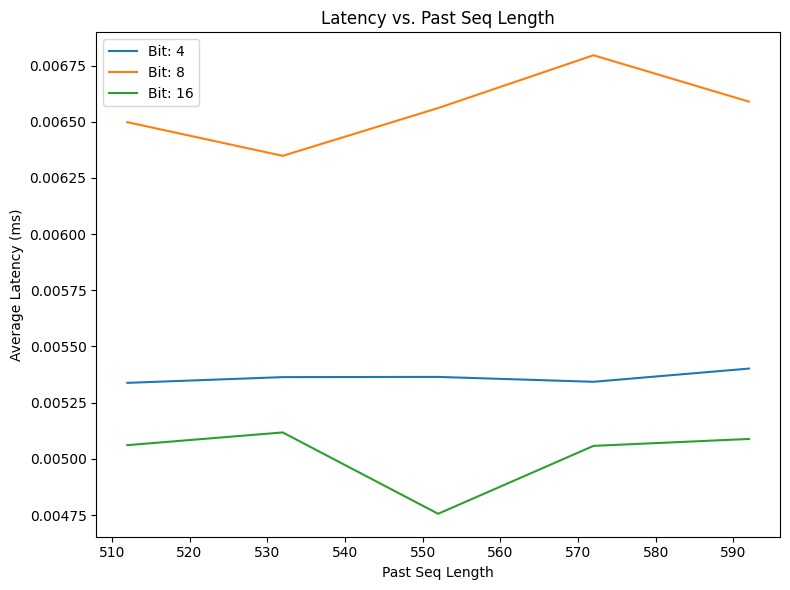

In [61]:
import matplotlib.pyplot as plt

# Filter data for desired batch_size and input_seq_length
target_table = df2[(df2["batch_size"] == 4) & (df2["input_seq_length"] == 1) &  (df2["past_seq_length"] >= 512)]

# Get unique bit values
bits = target_table['bit'].unique()

# Create a figure
fig, ax = plt.subplots(figsize=(8, 6))

# Plot the average latency as a function of past_seq_length for each bit value
for bit in bits:
    # Get the data for the current bit value
    data = target_table[target_table['bit'] == bit]

    # Plot the average latency as a function of past_seq_length
    ax.plot(data['past_seq_length'], data['lat_avg'], label=f"Bit: {bit}")

# Set the plot title and axis labels
ax.set_title("Latency vs. Past Seq Length")
ax.set_xlabel("Past Seq Length")
ax.set_ylabel("Average Latency (ms)")
ax.legend()

# Save the figure
fig.tight_layout()
fig.savefig("latency_vs_past_seq_length.png")

dict_keys([('A100', 128), ('A100', 512), ('V100', 128), ('V100', 512)])
    shard     h1     h2   bit  batch_size  input_seq_length  past_seq_length   
0       0  12288  49152     4           2               128                0  \
1       0  12288  49152     8           2               128                0   
2       0  12288  49152  8:tc           2               128                0   
3       0  12288  49152    16           2               128                0   
8       0  12288  49152     4           4               128                0   
9       0  12288  49152     8           4               128                0   
10      0  12288  49152  8:tc           4               128                0   
11      0  12288  49152    16           4               128                0   
16      0  12288  49152     4           8               128                0   
17      0  12288  49152     8           8               128                0   
18      0  12288  49152  8:tc           8       

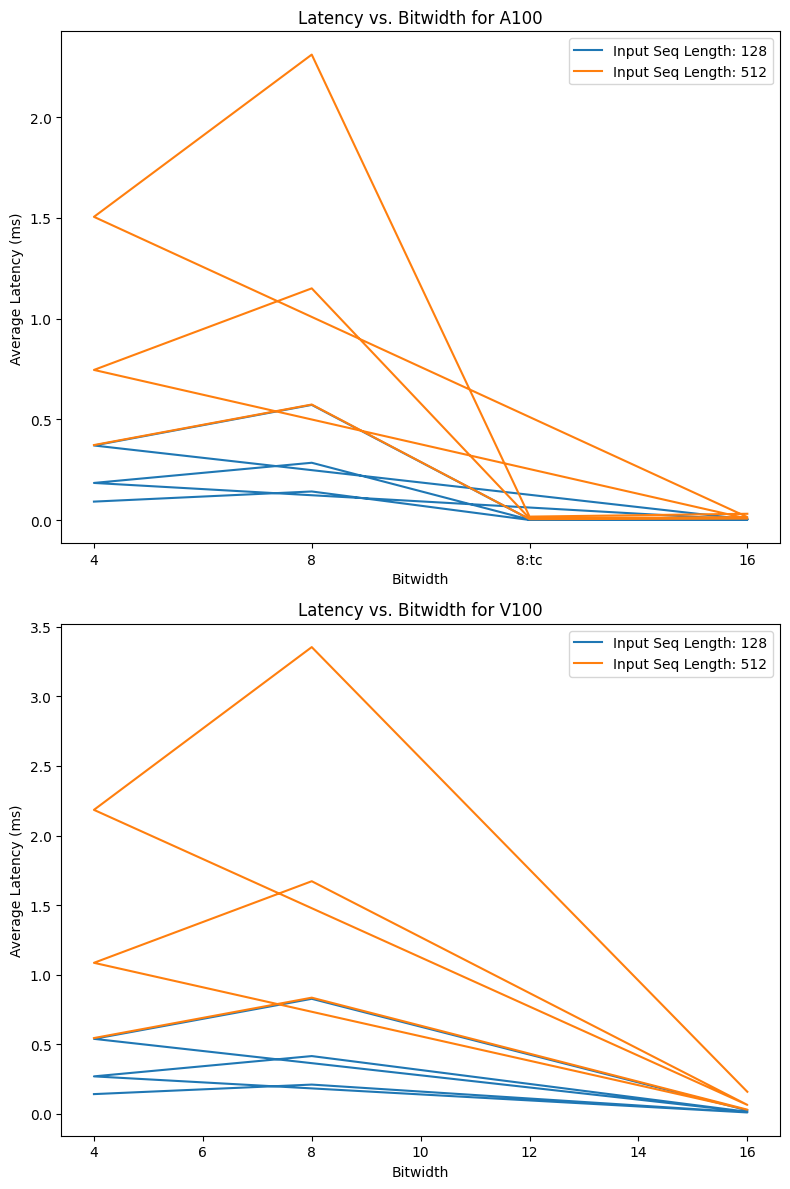

In [47]:
# prefill
df = df_concat
batch_size = 4
# df_concat[(df_concat['batch_size'] == 4) & ((df_concat['input_seq_length'] == 128)  | (df_concat['input_seq_length'] == 512))]
input_seq_lengths = [128, 512]
devices = df['device'].unique()
grouped_df = df[df['input_seq_length'].isin(input_seq_lengths)].groupby(['device', 'input_seq_length'])
keys = grouped_df.groups.keys()
print(keys)

# Print the available keys
# Create a figure with subplots for each device
fig, axes = plt.subplots(nrows=len(devices), ncols=1, figsize=(8, 6*len(devices)))

# Plot the average latency as a function of bitwidth for each device and input_seq_length value
for i, device in enumerate(devices):
    for input_seq_length in input_seq_lengths:
        # Get the data for the current device and input_seq_length value
        data = grouped_df.get_group((device, input_seq_length))
        print(data)  # Debugging line

        # Get the average latency for each bitwidth value
        latencies = data['lat_avg']

        # Plot the average latency as a function of bitwidth
        ax = axes[i] if len(devices) > 1 else axes
        ax.plot(data['bit'], latencies, label=f"Input Seq Length: {input_seq_length}")

    # Set the plot title and axis labels
    ax.set_title(f"Latency vs. Bitwidth for {device}")
    ax.set_xlabel("Bitwidth")
    ax.set_ylabel("Average Latency (ms)")
    ax.legend()

# Save the figure
fig.tight_layout()
fig.savefig("latency_vs_bitwidth.png")

In [26]:
df_concat[(df_concat['bit'] == 4) & (df_concat['batch_size'] == 4) & (df_concat['input_seq_length'] == 128)]

,shard,h1,h2,bit,batch_size,input_seq_length,past_seq_length,lat_avg,mem_weight,mem_kv,mem_embedding,mem_all,device
6,0,12288,49152,4,4,128,0,0.269827,288.445328,48.0,12.0,348.445328,V100


,shard,h1,h2,bit,batch_size,input_seq_length,past_seq_length,lat_avg,mem_weight,mem_kv,mem_embedding,mem_all,device
6,0,12288,49152,4,4,128,0,0.269827,288.445328,48.000,12.00000,348.445328,V100
9,0,12288,49152,4,4,512,0,1.085544,288.445328,192.000,48.00000,528.445328,V100
48,0,12288,49152,4,4,1,512,0.005338,288.445328,192.375,0.09375,480.914078,V100
49,0,12288,49152,4,4,1,532,0.005364,288.445328,199.875,0.09375,488.414078,V100
50,0,12288,49152,4,4,1,552,0.005365,288.445328,207.375,0.09375,495.914078,V100
51,0,12288,49152,4,4,1,572,0.005343,288.445328,214.875,0.09375,503.414078,V100
52,0,12288,49152,4,4,1,592,0.005402,288.445328,222.375,0.09375,510.914078,V100
63,0,12288,49152,4,4,1,128,0.004349,288.445328,48.375,0.09375,336.914078,V100
64,0,12288,49152,4,4,1,148,0.004356,288.445328,55.875,0.09375,344.414078,V100
65,0,12288,49152,4,4,1,168,0.004441,288.445328,63.375,0.09375,351.914078,V100


In [13]:
df_concat

,shard,h1,h2,bit,batch_size,input_seq_length,past_seq_length,lat_avg,mem_weight,mem_kv,mem_embedding,mem_all,device
0,0,12288,49152,4,2,128,0,0.092544,288.445328,24.00,6.0000,318.445328,A100
1,0,12288,49152,8,2,128,0,0.142835,576.468765,24.00,6.0000,606.468765,A100
2,0,12288,49152,8:tc,2,128,0,0.001521,1728.222691,24.00,6.0000,1758.222691,A100
3,0,12288,49152,16,2,128,0,0.002157,1152.140640,24.00,6.0000,1182.140640,A100
4,0,12288,49152,4,2,512,0,0.373129,288.445328,96.00,24.0000,408.445328,A100
...,...,...,...,...,...,...,...,...,...,...,...,...,...
103,0,12288,49152,16,8,1,128,0.005107,1152.140640,96.75,0.1875,1249.078140,V100
104,0,12288,49152,16,8,1,148,0.005400,1152.140640,111.75,0.1875,1264.078140,V100
105,0,12288,49152,16,8,1,168,0.004652,1152.140640,126.75,0.1875,1279.078140,V100
106,0,12288,49152,16,8,1,188,0.005245,1152.140640,141.75,0.1875,1294.078140,V100
